In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [503]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [11]:
df.head(10)

,FISCAL YEAR,SENTENCE ID,OFFENDER NUMBER,RACE,RACE GROUPING,GENDER,AGE,IN CUSTODY/COMMUNITY,SUPERVISION TYPE,JURISDICTION,SENTENCE TYPE,AGGREGATE SENTENCE LENGTH,INSTITUTIONAL SECURITY LEVEL,PROVINCE,LOCATION TYPE,OFFENDER SECURITY LEVEL,DYNAMIC/NEED,STATIC/RISK,REINTEGRATION POTENTIAL,MOTIVATION,RELIGION,WARRANT ID,COURT,OFFENCE ID,OFFENCE DESCRIPTION,RACIAL CATEGORY,SENTENCE LENGTH (YEARS)
0,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073751,POSS PROH/RESTR F/ARM W/AMMUN,White,3.00
1,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073752,FAIL TO COMPLY W/ PROBATION ORDER,White,3.00
2,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073753,POSS SCHEDULE I/II SUBST FOR PURP TRAFF,White,3.00
3,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029774,ASSAULT - USE OF FORCE,White,2.01
4,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029785,ROBBERY - ALL OTHERS,White,2.01
5,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00050993,ABBOTSFORD PROVINCIAL COURT,U80A00031390,FTC W/ COND. OF UNDER.,White,2.01
6,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00050993,ABBOTSFORD PROVINCIAL COURT,U80A00031391,FAIL TO APPEAR - APPEARANCE NOTICE,White,2.01
7,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,CNVR2F304626,ROBBERY,White,44.12
8,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,I53001001851,ESCAPE LAWFUL CUSTODY,White,44.12
9,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,I53001001853,THEFT OVER,White,44.12


### Structure:

#### Initial Dataset Exploration 

* Offence description - see if there's a way of grouping offence types
* Group by offender number to get unique individuals
* Race breakdown in dataset
    * Also indigenous v. not indigenous
* Gender breakdown in dataset
* Age breakdown in dataset 
* Custody v. community 
* Get mean number of sentences by offender number / mean number of offences by offender number - there will likely be multiple offences per sentence. 
    * Get mean number of offences per sentence ID
* Number of sentences/ offences per offender in custody v. community 
* Jurisdiction breakdown 
* Supervision type by community 
* Translate institutional security level and offender security level into numbers and see what the mean difference is 
* Proportion of high reintegration potential individuals who are in custody v. community 
* Religion vs. reintegration potential 

#### Exploring Racial Bias 

* Sentence length by race 
* Number of sentences by race / number of offences by race - total and mean
* Mean difference between institutional security level and offender security level by race 
* Offender age by race 
* Racial breakdown in community vs. custody 
* Supervision type by community by race 
* Proportion of high reintegration potential individuals who are in custody v. community by race 

#### Gender Breakdown

* Race breakdown by gender 
* Age by gender 
* Custody v. community 
* Supervision type by community by gender
* Mean number of sentences/ offences 
* Mean difference between institutional security level and offender security level by gender 
* Proportion of high reintegration potential individuals who are in custody v. community by gender 

#### Exploring Provincial Differences 

* Sentence length by province 
* Number of sentences/ offences by province 
* Mean difference between institutional security level and offender security level by province 

#### Exploring Differences by Year 

* Number of sentences by fiscal year / number of offences by fiscal year 
* Sentence length by year 

## Initial Dataset Exploration

In [13]:
df.describe()

,OFFENDER NUMBER,AGE,AGGREGATE SENTENCE LENGTH,SENTENCE LENGTH (YEARS)
count,731785.000000,731785.000000,731785.000000,731785.000000
mean,499586.764529,40.380289,2046.865935,5.607670
std,288055.510209,13.368668,2693.821850,7.380387
min,1.006663,18.000000,0.000000,0.000000
25%,251716.317500,30.000000,761.000000,2.080000
50%,497154.805000,38.000000,1281.000000,3.510000
75%,750048.793500,50.000000,2253.000000,6.170000
max,999982.260000,95.000000,43761.000000,119.890000


In [14]:
df.shape

(731785, 27)

In [245]:
len(df['OFFENCE DESCRIPTION'].unique())

739

Possible distinguishing words: 
* AGGRAVATED
* SEXUAL
* MURDER
* KIDNAP
* ARMED
* CHILD PORNOGRAPHY
* RAPE
* ABDUCTION
* HOSTAGE
* TRAFFICKING PERSONS
* TRAFFIC IN PERSONS

Let's get a sense of how many individual records vs. offenders in the dataset. From `df.shape` we could see there are 731,785 records. Let's see how many offenders are contained in these records.

In [31]:
len(df.groupby('OFFENDER NUMBER'))

48844

We'll go between grouping by offenders, sentences, and offences throughout the exploration. Let's look at the racial breakdown by offender, and also focus in on the breakdown between indigenous and non-indigenous groups.

In [168]:
df_off = df.groupby(['OFFENDER NUMBER', 'RACE GROUPING', 'RACIAL CATEGORY'])['OFFENCE ID'].count().reset_index()
df_off.head()

,OFFENDER NUMBER,RACE GROUPING,RACIAL CATEGORY,OFFENCE ID
0,1.006663,Indigenous,Indigenous,1
1,1.006663,Non Indigenous,Multi-Ethic,5
2,82.507100,Non Indigenous,White,9
3,104.763470,Non Indigenous,White,8
4,107.090843,Non Indigenous,White,9


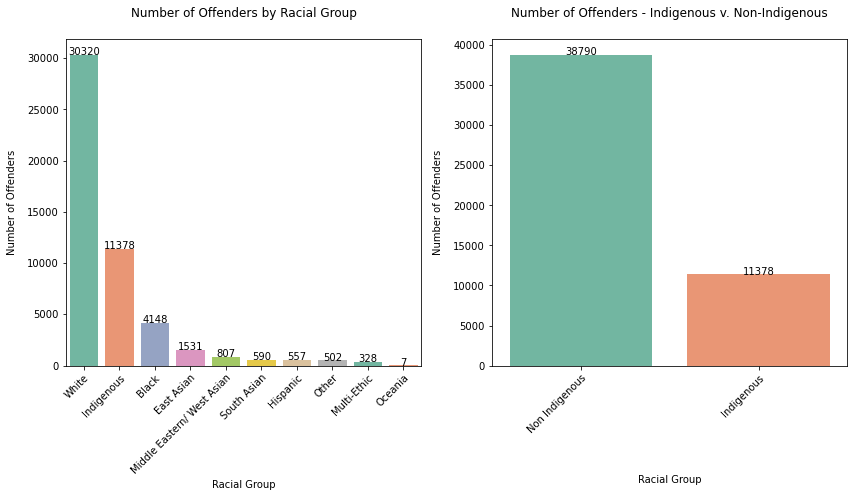

In [174]:
#Define a function that will show numbers above countplots
def show_values_on_bars(axis):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axis)

#Set figure size
fig, ax = plt.subplots(1,2, figsize = (14,6))

#First countplot 
ax[0].set_title('Number of Offenders by Racial Group', fontsize= 12, y =1.05) 
sns.countplot(x='RACIAL CATEGORY', data=df_off, order = df_off['RACIAL CATEGORY'].value_counts().index, ax=ax[0], palette = 'Set2')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right",rotation_mode='anchor')
show_values_on_bars(ax[0])  
ax[0].set_xlabel("Racial Group")
ax[0].set_ylabel("Number of Offenders",labelpad=10)

#Second countplot

ax[1].set_title("Number of Offenders - Indigenous v. Non-Indigenous", fontsize=12, y=1.05)
sns.countplot(x='RACE GROUPING', data=df_off, order = df_off['RACE GROUPING'].value_counts().index, ax=ax[1], palette='Set2')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right",rotation_mode='anchor')
show_values_on_bars(ax[1])
ax[1].set_xlabel("Racial Group", labelpad=40)
ax[1].set_ylabel("Number of Offenders",labelpad=10) 

plt.show()

The dataset we have is overwhelmingly white - if we're aiming to make predictions based on race, we'll have to rebalance the classes (currently about 1-3 Indigenous to White... if we want to look at other racial groups the disparity is even bigger).

Next up let's look at the gender breakdown of the dataset. 

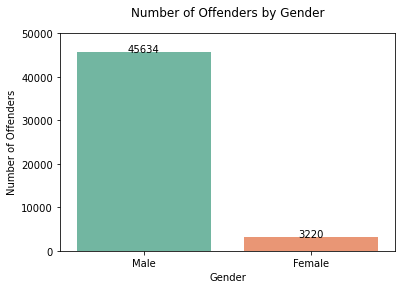

In [165]:
df_gen = df.groupby(['OFFENDER NUMBER','GENDER'])['OFFENCE ID'].count().reset_index()

ax = sns.countplot(x='GENDER', data=df_gen, order = df_gen['GENDER'].value_counts().index, palette = 'Set2')
ax.set_title('Number of Offenders by Gender', fontsize= 12, y =1.05) 
show_values_on_bars(ax)  
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Offenders")
ax.set(xticklabels=['Male', 'Female'])
ax.set_ylim(0,50000)

plt.show()

About 6.6% of our offenders are female - a very small sample size. We can have a look at the data broken down by gender later on in the investigation, but we should take it with a grain of salt and focus more on the male offender population.

Let's continue with our categorical exploration and determine how many individuals are in custody v. in the community. Additionally, for individuals who are in the community, we have a column defining the supervision type in the community. Let's have a look at this breakdown as well. 

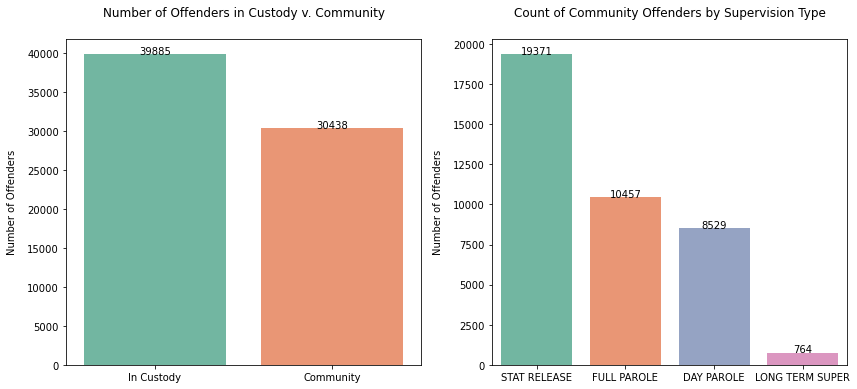

In [178]:
#Get number of individuals in custody v. community
df_cc = df.groupby(['OFFENDER NUMBER','IN CUSTODY/COMMUNITY'])['OFFENCE ID'].count().reset_index()

#Get records that are in the community 
df_sup = df[df['SUPERVISION TYPE'].notnull()]

#Group by offender number to get unique individuals and then by supervision type 
df_supg = df_sup.groupby(['OFFENDER NUMBER', 'SUPERVISION TYPE'])['OFFENCE ID'].count().reset_index()

#Set figure size
fig, ax = plt.subplots(1,2, figsize = (14,6))

#First countplot 
ax[0].set_title('Number of Offenders in Custody v. Community', fontsize= 12, y =1.05) 
sns.countplot(x='IN CUSTODY/COMMUNITY', data=df_cc, order = df_cc['IN CUSTODY/COMMUNITY'].value_counts().index, ax=ax[0], palette = 'Set2')
show_values_on_bars(ax[0])  
ax[0].set_xlabel("")
ax[0].set_ylabel("Number of Offenders",labelpad=10)

#Second countplot

ax[1].set_title("Count of Community Offenders by Supervision Type", fontsize=12, y=1.05)
sns.countplot(x='SUPERVISION TYPE', data=df_supg, order = df_supg['SUPERVISION TYPE'].value_counts().index, ax=ax[1], palette='Set2')
show_values_on_bars(ax[1])
ax[1].set_xlabel("", labelpad=10)
ax[1].set_ylabel("Number of Offenders",labelpad=10) 

plt.show()

It is important to understand the differences between the supervision types for offenders in the community. According to the CSC, they are as follows:

* **Statutory release:** is a mandatory release by law - most offenders, except those who are serving life or an indeterminate sentence, have to be released by the CSC with supervision after serving two thirds of their sentence, even though parole has not been granted. 
* **Full parole:** is a discretionary conditional release. The Parole Board of Canada evaluates the risk an offender poses to the community and determines whether to release them. 
* **Day parole:** provides offenders with the opportunity to take part in ongoing community-based activities. Usually the offender resides at a correctional institution or community-based residential facility. Offenders are also granted day parole to prepare for full parole and statutory release.
* **Long term supervision:** is an order imposed by the court as a sentencing option to an offender designated as a Dangerous Offender. The long-term supervision order commences when the offender has finished serving all sentences for offences for which they have been convicted. The period of supervision to which the offender is subject at any time must not total more than 10 years.

Let's next look at the age breakdown of the offenders in the dataset.

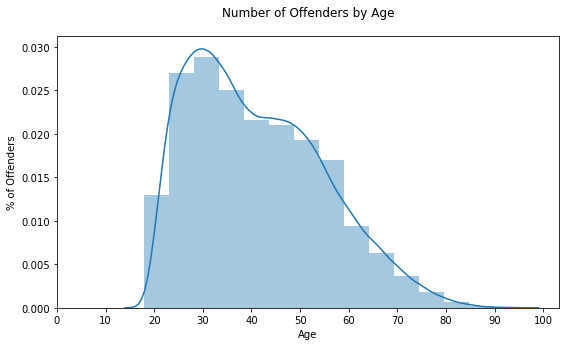

In [243]:
df_age = df.groupby(['OFFENDER NUMBER','AGE'])['OFFENCE ID'].count().reset_index()

fig, ax = plt.subplots(figsize=(9,5))
ax = sns.distplot(a=df_age['AGE'], bins=15)
ax.set_title('Number of Offenders by Age', fontsize= 12, y =1.05) 
ax.set_xlabel("Age")
ax.set_ylabel("% of Offenders")
x_ticks = np.arange(0, 101, 10)
ax.set_xticks(x_ticks)

plt.show()

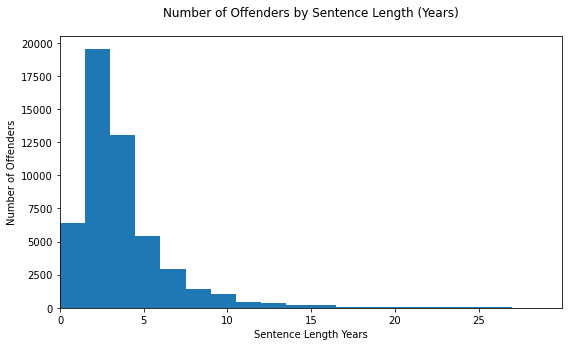

In [562]:
df_len = df.groupby(['OFFENDER NUMBER', 'SENTENCE ID'])['SENTENCE LENGTH (YEARS)'].mean().reset_index()

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(df_len['SENTENCE LENGTH (YEARS)'], bins = 80)
ax.set_title('Number of Offenders by Sentence Length (Years)', fontsize= 12, y =1.05) 
ax.set_xlabel("Sentence Length Years")
ax.set_ylabel("Number of Offenders")
x_ticks = np.arange(0, 30, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(0,30)

plt.show()

In [561]:
df_len.sort_values('SENTENCE LENGTH (YEARS)', ascending = False).head(10)

,OFFENDER NUMBER,SENTENCE ID,SENTENCE LENGTH (YEARS)
44235,858659.76030,V8000A000940,119.89
34636,671620.96040,CONVR2105806,77.80
20907,406867.22240,CONVR2105001,73.24
22048,427560.16770,CONVR2115951,73.07
18174,355141.65800,V4000A001208,64.78
6034,119001.40800,CONVR2122378,63.04
40727,790742.96910,CONVR2108428,61.04
19910,388028.10280,CONVR2118838,60.04
4956,97606.10798,CONVR2111244,58.41
39540,767932.04500,CONVR2100395,57.44


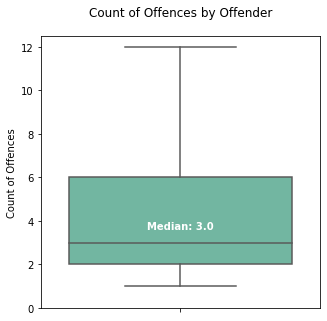

In [320]:
#Group by offender number to get unique individuals and then count the sentences and offences for each individual 
df_senoff = df.groupby('OFFENDER NUMBER')[['SENTENCE ID','OFFENCE ID']].nunique().reset_index()

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(x='OFFENCE ID', data=df_senoff,palette='Set2', orient='v')
ax.set_title('Count of Offences by Offender', fontsize= 12, y =1.05) 
ax.set_xlabel("")
ax.set_ylabel("Count of Offences")
ax.set_ylim(0,12.5)

median = df_senoff['OFFENCE ID'].median()
vertical_offset = df_senoff['OFFENCE ID'].median() * 0.2 # offset from median for display

ax.text(ax.get_xticks(),median + vertical_offset, 'Median: ' + str(median), horizontalalignment='center',color='w',weight='semibold')

plt.show()

The median number of offences committed by an offender is 3 - and most of these are on one sentence. However, it would be interesting to see what the highest number of offences are in the dataset, and how many sentences there are for the offences. Let's see the top 10 offence counts and get a sense of the offenders' profile.

In [389]:
grouped_top = df.groupby(['OFFENDER NUMBER', 'SENTENCE ID']).agg({'OFFENCE ID':'count','AGE':'first','SENTENCE LENGTH (YEARS)':'mean','RACIAL CATEGORY': 'first','IN CUSTODY/COMMUNITY': 'first','OFFENDER SECURITY LEVEL': 'first','INSTITUTIONAL SECURITY LEVEL': 'first','REINTEGRATION POTENTIAL': 'first','PROVINCE': 'first'}).sort_values('OFFENCE ID', ascending=False).reset_index()
grouped_top.head(20)

,OFFENDER NUMBER,SENTENCE ID,OFFENCE ID,AGE,SENTENCE LENGTH (YEARS),RACIAL CATEGORY,IN CUSTODY/COMMUNITY,OFFENDER SECURITY LEVEL,INSTITUTIONAL SECURITY LEVEL,REINTEGRATION POTENTIAL,PROVINCE
0,348602.4816,U30A00010707,1274,46,6.700000,White,In Custody,MAXIMUM,MAXIMUM,LOW,QUEBEC
1,862839.2161,V3000A002227,771,49,8.370000,White,Community,MEDIUM,MEDIUM,LOW,QUEBEC
2,446459.6274,V30A00008334,651,48,11.687143,White,In Custody,MAXIMUM,MAXIMUM,LOW,QUEBEC
3,487261.6137,CONVR2105560,490,40,33.312857,White,In Custody,MINIMUM,MINIMUM,LOW,QUEBEC
4,878778.2845,I31201000009,469,74,0.000000,White,In Custody,MINIMUM,MINIMUM,MEDIUM,QUEBEC
5,38113.0592,U30A00011315,447,47,3.150000,White,In Custody,MEDIUM,MEDIUM,LOW,QUEBEC
6,776039.8426,I34301002049,441,41,26.380000,White,In Custody,MEDIUM,MEDIUM,LOW,QUEBEC
7,844550.2607,I34301000880,434,53,0.000000,Black,In Custody,MAXIMUM,MAXIMUM,LOW,BRITISH COLUMBI
8,172722.7660,CONVR2102421,406,67,26.895714,White,In Custody,MEDIUM,MEDIUM,LOW,QUEBEC
9,903245.5693,CONVR2103311,406,56,45.411429,White,In Custody,MEDIUM,MEDIUM,MEDIUM,QUEBEC


In [390]:
grouped_top.describe()

,OFFENDER NUMBER,OFFENCE ID,AGE,SENTENCE LENGTH (YEARS)
count,51475.000000,51475.000000,51475.000000,51475.000000
mean,500237.716241,14.216319,38.209752,3.656464
std,288025.893808,23.035660,12.893899,3.575070
min,1.006663,1.000000,18.000000,0.000000
25%,252457.531700,4.000000,28.000000,2.000000
50%,500221.341800,8.000000,36.000000,2.960000
75%,749813.433600,16.000000,47.000000,4.370000
max,999982.260000,1274.000000,92.000000,119.890000


Interesting to see that the top offenders by offence ID have a couple of features in common:

* 17/20 of the top offenders are white 
* 18/20 are in custody 
* Half have a medium offender security level
* 15/20 have a low reintegration score 
* 16/20 are based in Quebec
* Mean age for top offenders is 38 (with an STD of 12)
* Mean sentence length for each offence is 3.6 years

This is the extreme of the dataset. Let's look at the mean - specifically, the number of sentences per offender and number of offences per sentence. Let's also see if there's a difference based on whether an individual is in custody v. in the community.

In [413]:
grouped = df.groupby('OFFENDER NUMBER')[['SENTENCE ID', 'OFFENCE ID']].nunique()
grouped.mean()

SENTENCE ID    1.053865
OFFENCE ID     4.884981
dtype: float64

In [447]:
custody_community = df.groupby(['IN CUSTODY/COMMUNITY', 'OFFENDER NUMBER'])[['SENTENCE ID','OFFENCE ID']].nunique().reset_index()
print("Average num sentences and offences in custody: \n" +  str(custody_community[custody_community['IN CUSTODY/COMMUNITY'] == 'In Custody'][['SENTENCE ID', 'OFFENCE ID']].mean()) + "\n","\nAverage num sentences and offences in community: \n" +  str(custody_community[custody_community['IN CUSTODY/COMMUNITY'] == 'Community'][['SENTENCE ID', 'OFFENCE ID']].mean()))

Average num sentences and offences in custody: 
SENTENCE ID    1.051974
OFFENCE ID     5.085721
dtype: float64
 
Average num sentences and offences in community: 
SENTENCE ID    1.016361
OFFENCE ID     4.538997
dtype: float64


Looks like there are slightly more offences associated with being in custody v. in the community, but roughly the same number of sentences. Let's now get a quick count of the number of offenders by jurisdiction. 

In [448]:
df.groupby('JURISDICTION')['OFFENDER NUMBER'].nunique()

JURISDICTION
FEDERAL       48043
PROVINCIAL      842
Name: OFFENDER NUMBER, dtype: int64

Only 1.75% of the dataset is in the provincial jurisdiction - most of the individuals went through the federal system. Let's look at reintegration potential - it would be good to see the proportion of individuals with high reintegration potential who are in the community vs. in custody.

In [464]:
reint = df.groupby(['IN CUSTODY/COMMUNITY', 'REINTEGRATION POTENTIAL'])['OFFENDER NUMBER'].nunique()
reint_pcts = reint.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
reint_pcts

IN CUSTODY/COMMUNITY  REINTEGRATION POTENTIAL
Community             HIGH                       39.592025
                      LOW                        14.490798
                      MEDIUM                     45.917178
In Custody            HIGH                       19.043393
                      LOW                        35.008078
                      MEDIUM                     45.948529
Name: OFFENDER NUMBER, dtype: float64

About 46% of individuals in custody as well as the community have medium reintegration potential - this might show the gray area in determining parole. It would be interesting to dive deeper and get a sense of the specifics of each individual's reintegration score. 

Later in the exploration, we'll dive into the features of individuals who have high reintegration potential, but who are still in custody. 

For now, let's map the high, medium, and low categorical values of 'INSTITUTIONAL SECURITY LEVEL','OFFENDER SECURITY LEVEL', 'DYNAMIC/NEED', 'STATIC/RISK', 'REINTEGRATION POTENTIAL' and 'MOTIVATION' to numbers in order to look deeper into the dataset. 

In [504]:
def high_low(x): 
    if x == 'HIGH':
        y = 3
    elif x == 'MEDIUM':
        y = 2
    elif x == 'LOW':
        y = 1
    else:
        y = np.nan
    return y

def max_min(x):
    if x == 'MAXIMUM':
        y = 3
    elif x == 'MEDIUM':
        y = 2
    elif x == 'MINIMUM':
        y = 1
    else:
        y = np.nan
    return y 

cols_high_low = ['DYNAMIC/NEED', 'STATIC/RISK', 'REINTEGRATION POTENTIAL', 'MOTIVATION']
cols_max_min = ['INSTITUTIONAL SECURITY LEVEL','OFFENDER SECURITY LEVEL']

for c in cols_high_low:   
    df[c] = df[c].apply(lambda x: high_low(x))

for c in cols_max_min:   
    df[c] = df[c].apply(lambda x: max_min(x))

Let's now create a new column called 'SECURITY DIFFERENCE' which will look at the difference between the institutional security level and the offender security level. We can make the following conclusions:

* If the difference is 0, then the offender is in the appropriate setting for their security level
* If the difference is negative, then the offender is in an institution with a lower security setting than appropriate
* If the difference is positive, then the offender is in an instutition with a higher security setting than appropriate 

We'll also graph this to get a breakdown of security differences.

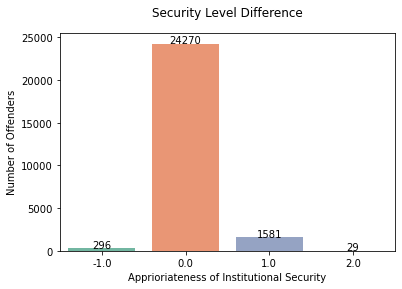

In [515]:
df['SECURITY DIFFERENCE'] = df['INSTITUTIONAL SECURITY LEVEL'] - df['OFFENDER SECURITY LEVEL']

df_secdiff = df.groupby(['OFFENDER NUMBER','SECURITY DIFFERENCE'])['OFFENCE ID'].count().reset_index()

ax = sns.countplot(x='SECURITY DIFFERENCE', data=df_secdiff, palette = 'Set2')
ax.set_title('Security Level Difference', fontsize= 12, y =1.05) 
show_values_on_bars(ax)  
ax.set_xlabel("Apprioriateness of Institutional Security")
ax.set_ylabel("Number of Offenders")

plt.show()

It's good to see that the majority of offenders are in the appropriate setting for their security level. Later on we'll dig into the 1,581 individuals who are in a higher security setting than appropriate. 

For now, let's move on to finding individuals who have the best and worst security and reintegration potential scores.

In [520]:
best_scores = df[(df['OFFENDER SECURITY LEVEL'] == 1) & (df['REINTEGRATION POTENTIAL'] == 3)]
worst_scores = df[(df['OFFENDER SECURITY LEVEL'] == 3) & (df['REINTEGRATION POTENTIAL'] == 1)]

In [521]:
best_scores.describe()

,OFFENDER NUMBER,AGE,AGGREGATE SENTENCE LENGTH,INSTITUTIONAL SECURITY LEVEL,OFFENDER SECURITY LEVEL,DYNAMIC/NEED,STATIC/RISK,REINTEGRATION POTENTIAL,MOTIVATION,SENTENCE LENGTH (YEARS),SECURITY DIFFERENCE
count,86758.000000,86758.000000,86758.000000,7754.000000,86758.0,86665.000000,86665.000000,86758.0,86665.000000,86758.000000,7754.000000
mean,508891.433185,45.241626,1857.406153,1.116585,1.0,1.527399,1.488190,3.0,2.759430,5.088464,0.116585
std,282325.526818,14.542401,3068.403459,0.336637,0.0,0.591674,0.599934,0.0,0.441325,8.406536,0.336637
min,82.507100,18.000000,0.000000,1.000000,1.0,1.000000,1.000000,3.0,1.000000,0.000000,0.000000
25%,272168.771400,33.000000,731.000000,1.000000,1.0,1.000000,1.000000,3.0,3.000000,2.000000,0.000000
50%,514922.558500,44.000000,1111.000000,1.000000,1.0,1.000000,1.000000,3.0,3.000000,3.040000,0.000000
75%,751264.073700,56.000000,1827.000000,1.000000,1.0,2.000000,2.000000,3.0,3.000000,5.010000,0.000000
max,999982.260000,92.000000,43761.000000,3.000000,1.0,3.000000,3.000000,3.0,3.000000,119.890000,2.000000


In [522]:
worst_scores.describe()

,OFFENDER NUMBER,AGE,AGGREGATE SENTENCE LENGTH,INSTITUTIONAL SECURITY LEVEL,OFFENDER SECURITY LEVEL,DYNAMIC/NEED,STATIC/RISK,REINTEGRATION POTENTIAL,MOTIVATION,SENTENCE LENGTH (YEARS),SECURITY DIFFERENCE
count,81370.000000,81370.000000,81370.000000,58745.000000,81370.0,81364.000000,81365.000000,81370.0,81364.000000,81370.000000,58745.000000
mean,487226.500918,35.301868,2274.011097,2.975402,3.0,2.965722,2.885602,1.0,1.436790,6.230097,-0.024598
std,293110.218216,10.688927,2720.190075,0.154897,0.0,0.182348,0.322554,0.0,0.514002,7.452639,0.154897
min,1.006663,18.000000,0.000000,2.000000,3.0,1.000000,1.000000,1.0,1.000000,0.000000,-1.000000
25%,218883.997900,27.000000,745.000000,3.000000,3.0,3.000000,3.000000,1.0,1.000000,2.040000,0.000000
50%,482498.938600,33.000000,1525.000000,3.000000,3.0,3.000000,3.000000,1.0,1.000000,4.180000,0.000000
75%,733464.020200,42.000000,2860.000000,3.000000,3.0,3.000000,3.000000,1.0,2.000000,7.840000,0.000000
max,999732.489200,80.000000,28398.000000,3.000000,3.0,3.000000,3.000000,1.0,3.000000,77.800000,0.000000


From the numbers, we can see that the individuals with the best scores are on average 10 years older, and have a sentence length that's a year shorter than those with the worst scores. Additionally, they're more likely to be in an institution that has a higher level of security than their offender security level needs. 

Finally, let's look at a provincial level breakdown of offenders before moving on to looking at whether there are signs of racial bias in the dataset. 

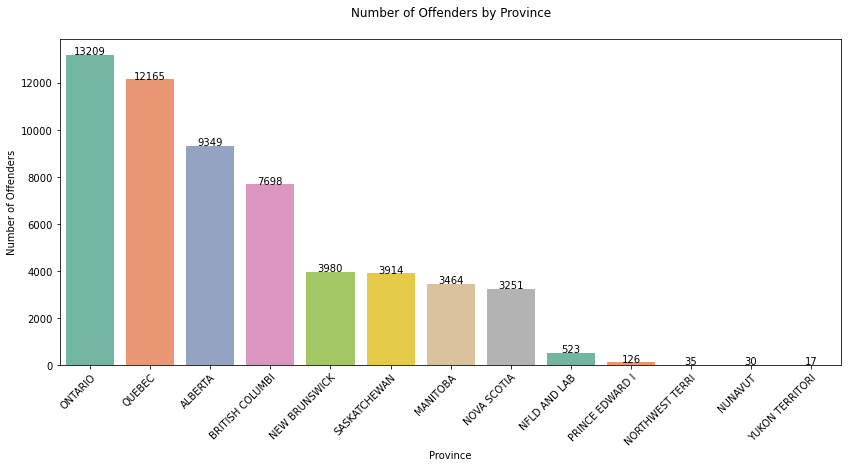

In [528]:
#Edit this to be a map later 

df_prov = df.groupby(['OFFENDER NUMBER','PROVINCE'])['OFFENCE ID'].count().reset_index()

fig, ax = plt.subplots(figsize = (14,6))

ax = sns.countplot(x='PROVINCE', data=df_prov, order = df_prov['PROVINCE'].value_counts().index, palette = 'Set2')
ax.set_title('Number of Offenders by Province', fontsize= 12, y =1.05) 
show_values_on_bars(ax)  
ax.set_xlabel("Province")
ax.set_ylabel("Number of Offenders")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode='anchor')

plt.show()

## Exploring Racial Bias 

* Sentence length by race 
* Number of sentences by race / number of offences by race - total and mean
* Mean difference between institutional security level and offender security level by race 
* Offender age by race 
* Racial breakdown in community vs. custody 
* Supervision type by community by race 
* Proportion of high reintegration potential individuals who are in custody v. community by race 

Considering that about 94% of the dataset consists of offenders who are white, black, or indigenous, we'll subset our dataframe on that demographic to ensure we're making meaningful conclusions.

In [596]:
race_df = df[(df['RACIAL CATEGORY'] == 'White') | (df['RACIAL CATEGORY'] == 'Black')| (df['RACIAL CATEGORY'] == 'Indigenous')]

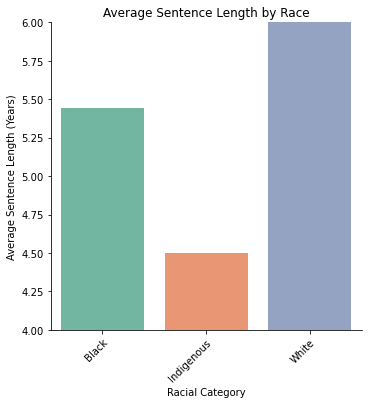

In [610]:
df_len_race = race_df.groupby('RACIAL CATEGORY')['SENTENCE LENGTH (YEARS)'].mean().reset_index()

ax = sns.catplot(x="RACIAL CATEGORY", y="SENTENCE LENGTH (YEARS)", data=df_len_race, kind='bar', palette='Set2') 
ax.set_xlabels('Racial Category') 
ax.set_ylabels('Average Sentence Length (Years)')
ax.set(ylim=(4, 6), title='Average Sentence Length by Race')
ax.set_xticklabels(rotation=45, ha="right",rotation_mode='anchor')

plt.show()

In [639]:
grouped_race = race_df.groupby('RACIAL CATEGORY')[['OFFENDER NUMBER', 'SENTENCE ID', 'OFFENCE ID']].nunique()
grouped_race

,OFFENDER NUMBER,SENTENCE ID,OFFENCE ID
RACIAL CATEGORY,,,
Black,4148,4301,17083
Indigenous,11378,12064,53643
White,30320,31848,158656


In [644]:
race_df.groupby('RACIAL CATEGORY')[['SECURITY DIFFERENCE', 'AGE', 'SENTENCE LENGTH (YEARS)', 'OFFENDER SECURITY LEVEL', 'REINTEGRATION POTENTIAL']].mean()

,SECURITY DIFFERENCE,AGE,SENTENCE LENGTH (YEARS),OFFENDER SECURITY LEVEL,REINTEGRATION POTENTIAL
RACIAL CATEGORY,,,,,
Black,0.026652,34.054576,5.440336,2.000158,1.772042
Indigenous,0.026847,36.729236,4.502413,1.965876,1.599290
White,0.030230,42.620249,6.015799,1.837219,1.818318


In [646]:
race_df.groupby(['RACIAL CATEGORY', 'GENDER'])['OFFENDER NUMBER'].count()

RACIAL CATEGORY  GENDER
Black            FEMALE      1892
                 MALE       51245
Indigenous       FEMALE     11751
                 MALE      141748
White            FEMALE     17891
                 MALE      466310
Name: OFFENDER NUMBER, dtype: int64